Text(0.5, 1.0, 'Distribution of Cardiovascular Disease in the Dataset')

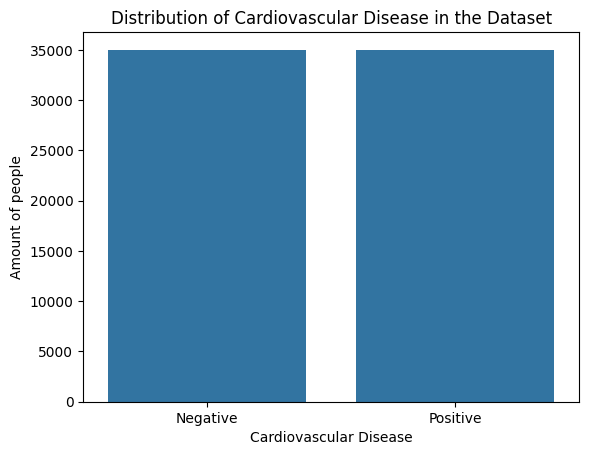

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv(r"cardio_train.csv", sep=";")

cardio_counts = df["cardio"].value_counts()
sns.barplot(x=cardio_counts.index, y=cardio_counts.values)
plt.xticks(ticks=[0,1], labels=["Negative", "Positive"])
plt.ylabel("Amount of people")
plt.xlabel("Cardiovascular Disease")
plt.title("Distribution of Cardiovascular Disease in the Dataset")

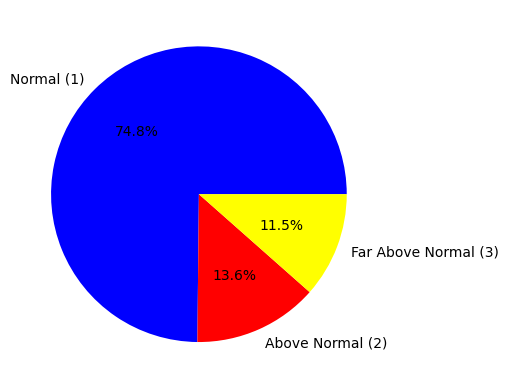

In [3]:
#This data will show a piechart showcasing the percentage of what peoples cholesterol looks like
cholesterol_count = df["cholesterol"].value_counts()
plt.pie(cholesterol_count.values, autopct="%1.1f%%", colors=["blue","red","yellow"], labels= ["Normal (1)", "Above Normal (2)", "Far Above Normal (3)"])
plt.show()


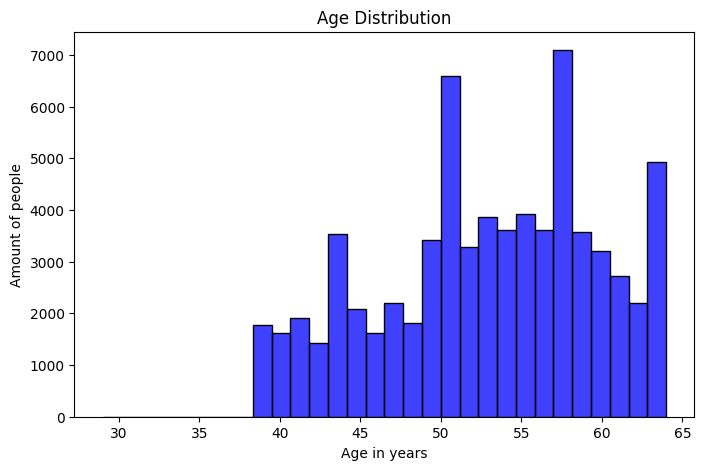

In [ ]:
#This data looks at histogram showing the difference in age of people the people in this data in Cardiovascular Disease
if df["age"].max() > 150:
    df["age"] = (df["age"] / 365).astype(int)
plt.figure(figsize=(8,5))
sns.histplot(df["age"], bins=30, color="blue")
plt.xlabel("Age in years")
plt.ylabel("Amount of people")
plt.title("Patients age ")
plt.show()

In [35]:
#How many people in the data smokes
smokers = df["smoke"].sum()
people = len(df)
percentage_smokers = (smokers / people) * 100 
print(f"Total number of smokers: {smokers}")
print(f"Percentage of smokers: {percentage_smokers:.3}%")

Total number of smokers: 6048
Percentage of smokers: 8.8%


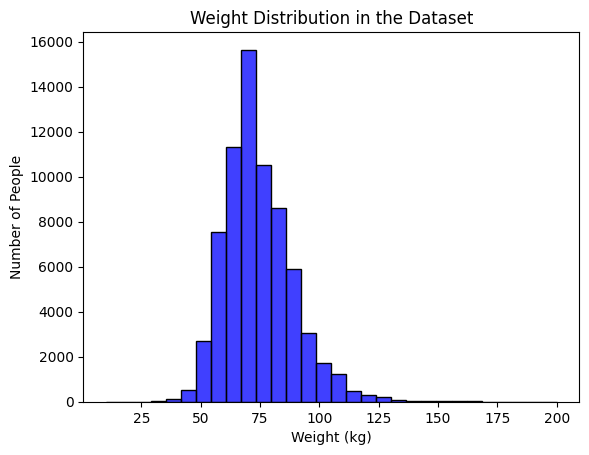

In [ ]:
#Histogram showcasing which weight that's more common
sns.histplot(df["weight"], bins=30, color="blue")
plt.xlabel("Weight in kg")
plt.ylabel("Number of People")
plt.title("Weight Distribution in the Dataset")
plt.show()


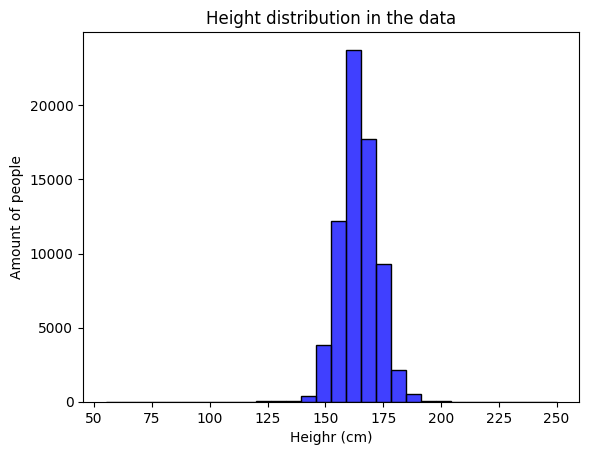

In [ ]:
#Histogram showcasing the difference in height
sns.histplot(df["height"], bins=30, color="blue")
plt.xlabel("Heighr in cm")
plt.ylabel("Amount of people")
plt.title("Height distribution in the data")
plt.show()

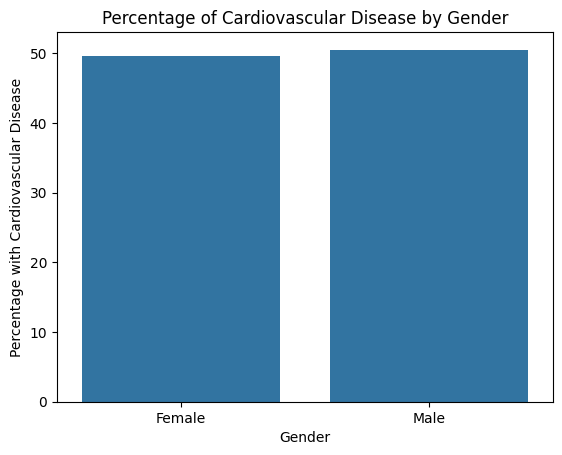

In [ ]:
#Barplots showing how many procent of the different gender got cardiovascular disease
cardio_by_gender = df.groupby("gender")["cardio"].mean() * 100  #Get the procentage of cardiovascular disease by gender 
sns.barplot(x=cardio_by_gender.index, y=cardio_by_gender.values)
plt.xticks(ticks=[0, 1], labels=["Female", "Male"])
plt.ylabel("Percentage with Cardiovascular Disease")
plt.xlabel("Gender")
plt.title("Percentage of Cardiovascular Disease by Gender")
plt.show()


To create a BMI feature for the data, it will be using the BMI formula BMI = (Weight/(height)**2)

In [9]:
#Creates feature for BMI using the formula over
df["height_meters"] = (df["height"] / 100)
df["BMI"] = (df["weight"] / (df["height_meters"] * 2))
df = df.drop(columns="height_meters")


In [ ]:
# obesity begins at a BMI of 30, and extreme obesity rarely exceeds 50.  
# Additionally, a BMI below 10 is unrealistic
df = df[(df["BMI"] >= 10) & (df["BMI"] <= 50)]

In [ ]:
#Categorizing BMI in different classes
def categorize_BMI(bmi):
    if bmi < 18.5:
        return "underweight"
    elif 18.5 <= bmi < 25:
        return "Normal weight"
    elif 25 <= bmi < 30:
        return "Overweight"
    elif 30 <= bmi < 35:
        return "Obese(class I)"
    elif 35 <= bmi < 40:
        return "Obese(Class II)"
    else:
        return "Obese(Class III)"
    
df["BMI_class"] = df["BMI"].apply(categorize_BMI)

In [ ]:
#Removes outliers first because anything outside those ranges seeems unrealistic and after creates a function classifying people for their blood pressure and makes it a column
df = df[(df["ap_hi"] >= 60) & (df["ap_hi"] <= 225)]
df = df[(df["ap_lo"] >= 30) & (df["ap_lo"] <= 150)]
def blood_pressure_classification(ap_hi, ap_lo):
    if ap_hi < 120 and ap_lo < 80:
        return "healthy"
    elif 120 <= ap_hi <= 129 and ap_lo < 80:
        return "elevated"
    elif 130 <= ap_hi <= 139 or 80 <= ap_lo <= 89:
        return "Stage I hypertension"
    elif 140 <= ap_hi or ap_lo >= 90:
        return "Stage II hypertension"
    elif ap_hi > 180 or ap_lo > 120:
        return "Hypertensive crisis"
    
df["Blood_Pressure_Stage"] = df.apply(lambda row: blood_pressure_classification(row["ap_hi"], row["ap_lo"]), axis=1)

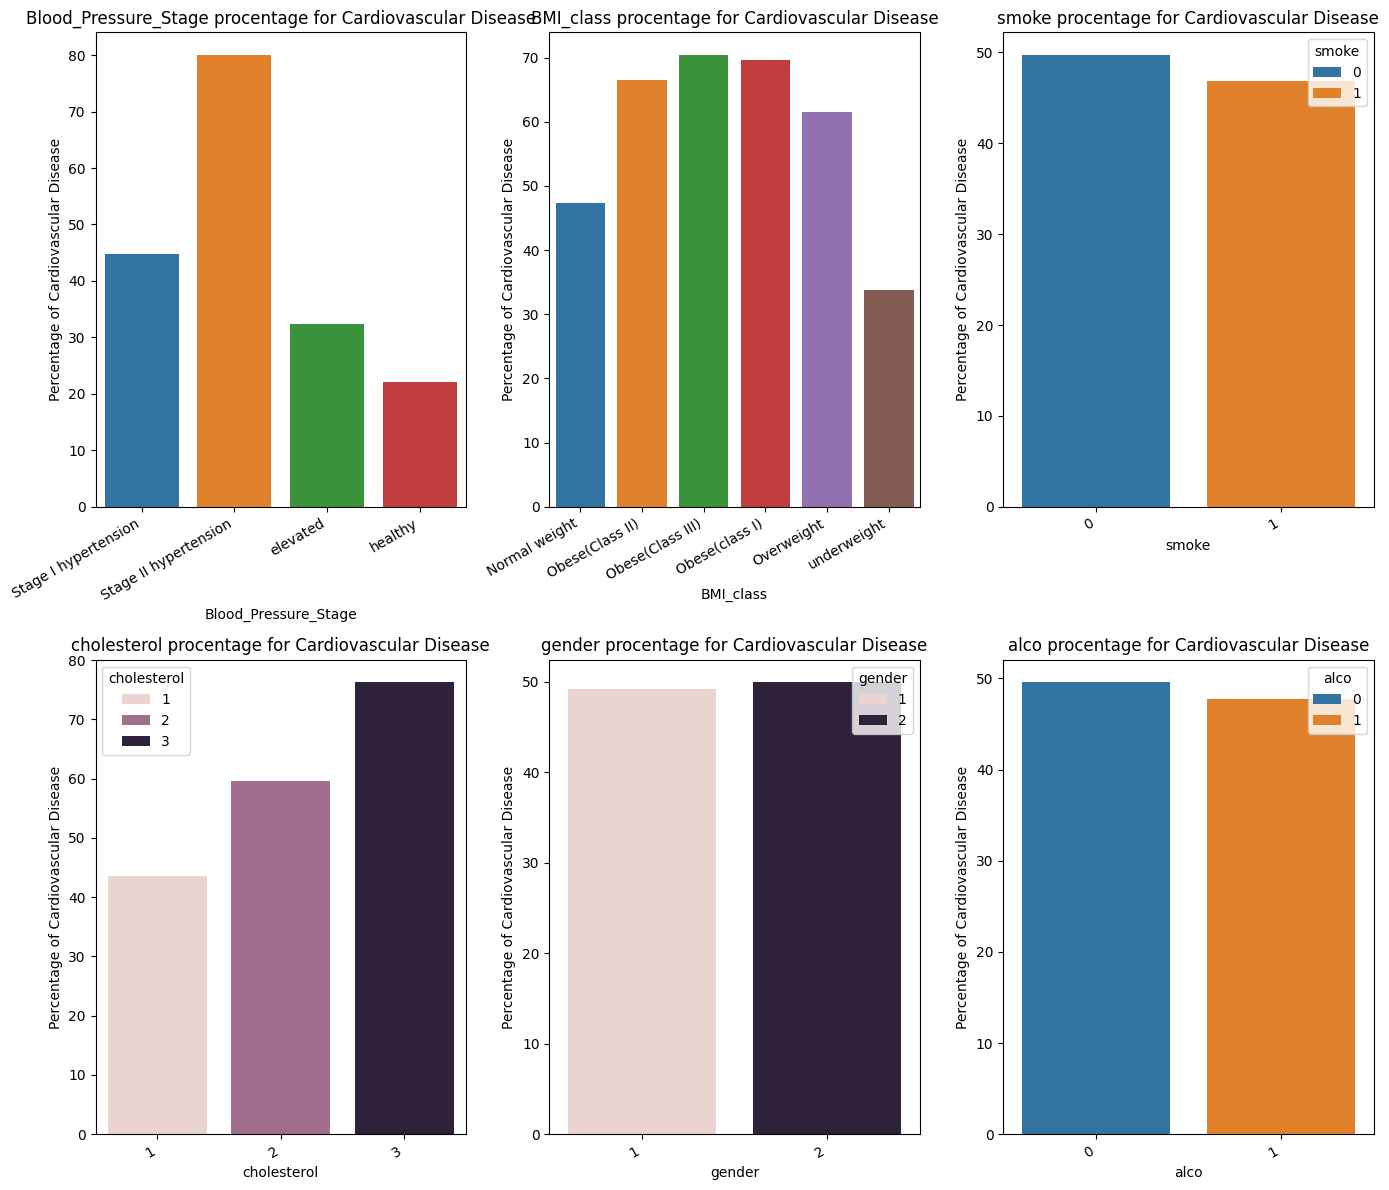

In [ ]:
#Creates 4 different subplots
fig, axes = plt.subplots(2, 3, figsize=(14,12)) 

#Creating a function that creates a visual barplots showcasing side by side difcomparison on people who have Cardiovascular disease and those have not 
def barplot_features(feature, ax):
    category_ratio = df.groupby(feature)["cardio"].mean() * 100  #Creating a procentage for the cardiovascual disease for the feature being picked in the function
    sns.barplot(x=category_ratio.index, y=category_ratio.values, ax=ax, hue=category_ratio.index)
    ax.set_xlabel(feature)
    ax.set_ylabel("Percentage of Cardiovascular Disease")
    ax.set_title(f"{feature} procentage for Cardiovascular Disease")
    ax.set_xticks(ax.get_xticks()) 
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")

#Made six diffrent plots
#First: showcasing how much procentage got cardivascular diease in different blood pressure
#Second: Showcasing how much procentage  got cardivascular diease in the different BMI
#Third: Showcasing how much procentage smokers and non smokers got cardivascular diease
#Fourth: How much procentage got cardiovascular diease in different cholesterol
#Five: How much much procentage Male and Female got cardiovascular diease
#Six: How much procentage alcohol consumers vs non consumers got cardiovascular diease
barplot_features("Blood_Pressure_Stage", axes[0, 0])
barplot_features("BMI_class", axes[0, 1])
barplot_features("smoke", axes[0, 2])
barplot_features("cholesterol", axes[1, 0])
barplot_features("gender", axes[1,1])
barplot_features("alco", axes[1,2] )
plt.tight_layout()
plt.show()

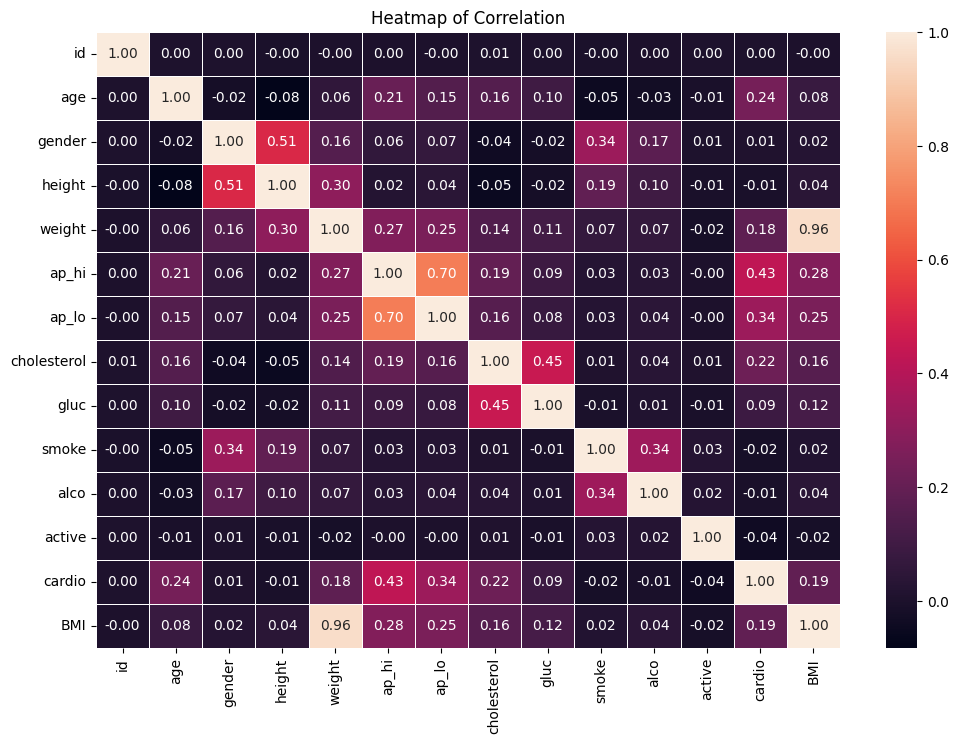

In [ ]:

#Creates a corroleation matrix
df_number = df.select_dtypes(include=['number'])
correlation_matrix = df_number.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=0.5)
plt.title("Heatmap of Correlation")
plt.show()


The heatmap shows that the featues with the highest correlations are BMI and weight which is because BMI is calculated by weight. Ap_hi and ap_lo also shares high correlation because inviduals with high systolic blood pressures usually has high diastolic blood pressure aswell.

In [ ]:
#Create copies of the dataset
df_1 = df.copy()
df_2 = df.copy()
#Drops columns
df_1.drop(columns=["ap_hi", "ap_lo", "height", "weight", "BMI"], inplace=True, errors="ignore")
df_2.drop(columns=["BMI_class", "Blood_Pressure_Stage", "height", "weight"], inplace=True, errors="ignore")
#Makes one-hot encoding
df_1 = pd.get_dummies(df_1, columns=[col for col in ["BMI_class", "Blood_Pressure_Stage", "gender"] if col in df_1.columns], drop_first=True, dtype=int)
df_2 = pd.get_dummies(df_2, columns=[col for col in ["gender"] if col in df_2.columns], drop_first=True, dtype=int)



Function under trains the data using 3 different Machinelearning functions, 
Logistic because it handles binary classification task well,
Random Forest used as well because it's suited to handle one-hot encoded categories variables very well like blood pressure categories etc,
KNN was chosen for it's accuracy with one-hot encoding
These different machinelearning function ensures that linear,non-linear and distance based relationships are compared

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
#Creates function that takes the dataframe as a argument and makes standardisation as the standard
def Machinelearning(df, scaler_type="standard"):
    print(f"{df} using {scaler_type}\n")
    X = df.drop(columns=["cardio"])
    y = df["cardio"]
    #creates a train_test_split, X_temp used for the test and validation data, 70% trainingng data, 15% validation and 15% testing data.
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=0.7, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    #Creates variables for Standardisation and normalisation.
    standard_scaler = StandardScaler()
    normalised_scaler = MinMaxScaler()

    #When code runs and the function gets standard as argument it'll scale the training and validation data.
    if scaler_type == "standard":
        X_train_scaled = standard_scaler.fit_transform(X_train)
        X_val_scaled = standard_scaler.transform(X_val)

    #Do the same here but if the functions get something other than standard it will normalize the code using minmax
    else:
        X_train_scaled =  normalised_scaler.fit_transform(X_train)
        X_val_scaled =  normalised_scaler.transform(X_val)


    #Hyperparameters
    #For the Logistic the functions has 4 different regularization, so it'll try with both a weak and strong regularization
    #Solver it has 2 different algorithms so in total the code has 8 different hyperparameters to try
    Grid_logistic = {
        "C": [0.01, 0.1, 1, 10], 
        "solver": ["liblinear", "lbfgs"]
    }

    # Random Forest has 27 different hyperparameters
    Grid_Random_Forest = {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5, 10]
    }

    Grid_KNN = {
        "n_neighbors": [5, 10, 15, 30, 40],
        "weights": ["uniform"]
    }
    #Creates each model and use five cross validation on them all. 
    grid_lr = GridSearchCV(LogisticRegression(), Grid_logistic, scoring="accuracy", cv=5, n_jobs=-1)
    grid_rf = GridSearchCV(RandomForestClassifier(), Grid_Random_Forest, scoring="accuracy", cv=5, n_jobs=-1)
    grid_knn = GridSearchCV(KNeighborsClassifier(), Grid_KNN, scoring="accuracy", cv=5, n_jobs=-1)

    #Trains the data 
    grid_lr.fit(X_train_scaled, y_train)
    grid_rf.fit(X_train_scaled, y_train)
    grid_knn.fit(X_train_scaled, y_train)

    #makes predictons
    y_pred_lr = grid_lr.predict(X_val_scaled)
    y_pred_rf = grid_rf.predict(X_val_scaled)
    y_pred_knn = grid_knn.predict(X_val_scaled)

    models = {
        "Logistic Regression": (y_val, y_pred_lr),
        "Random Forest": (y_val, y_pred_rf),
        "KNN": (y_val, y_pred_knn)
    }
    #Counts the accuracy
    for machine, (y_true, y_pred) in models.items():
        acc = accuracy_score(y_true, y_pred)
        print(f"{machine}: Accuracy = {acc:.3f}")

    print("Best Parameters:")
    print("Logistic Regression:", grid_lr.best_params_)
    print("Random Forest:", grid_rf.best_params_)
    print("KNN:", grid_knn.best_params_)

Machinelearning(df_1, scaler_type="standard")
Machinelearning(df_1, scaler_type="normalised")
Machinelearning(df_2, scaler_type="standard")
Machinelearning(df_2, scaler_type="normalised")




Data using standard
Logistic Regression: Accuracy = 0.706
Random Forest: Accuracy = 0.707
KNN: Accuracy = 0.693
Best Parameters:
Logistic Regression: {'C': 0.01, 'solver': 'liblinear'}
Random Forest: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
KNN: {'n_neighbors': 40, 'weights': 'uniform'}
Data using normalised
Logistic Regression: Accuracy = 0.706
Random Forest: Accuracy = 0.708
KNN: Accuracy = 0.693
Best Parameters:
Logistic Regression: {'C': 0.1, 'solver': 'lbfgs'}
Random Forest: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
KNN: {'n_neighbors': 40, 'weights': 'uniform'}
Data using standard
Logistic Regression: Accuracy = 0.727
Random Forest: Accuracy = 0.735
KNN: Accuracy = 0.727
Best Parameters:
Logistic Regression: {'C': 1, 'solver': 'lbfgs'}
Random Forest: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}
KNN: {'n_neighbors': 40, 'weights': 'uniform'}
Data using normalised
Logistic Regression: Accuracy = 0.727
Random Forest: Accu

In [ ]:
from sklearn.ensemble import VotingClassifier
X = df_2.drop(columns=["cardio"])
y = df_2["cardio"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
#Creates the models and parameters
Logistic_Regression = LogisticRegression(C=10, solver='lbfgs', random_state=42)
Random_Forest = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=10, random_state=42)
KNN = KNeighborsClassifier(n_neighbors=30, weights='uniform')

#Makes the votingclassifiers and adds the estimators
voting_clf = VotingClassifier(
    estimators=[
        ('lr', Logistic_Regression),
        ('rf', Random_Forest),
        ('knn', KNN)
    ],
    #Voting chosen as hard to make it more balanced between the predictions
    voting='hard'
)

voting_clf.fit(X_train_scaled, y_train)
y_pred = voting_clf.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
print("VotingClassifier Results:")
print(f"Accuracy: {acc:.3f}")

VotingClassifier Results:
Accuracy: 0.731


The dataset selected is df_2, which includes one-hot encoded features for BMI category, blood pressure category, and gender. The model chosen for voting classifier is the same as before Random Forest, Logistic Regression and KNN

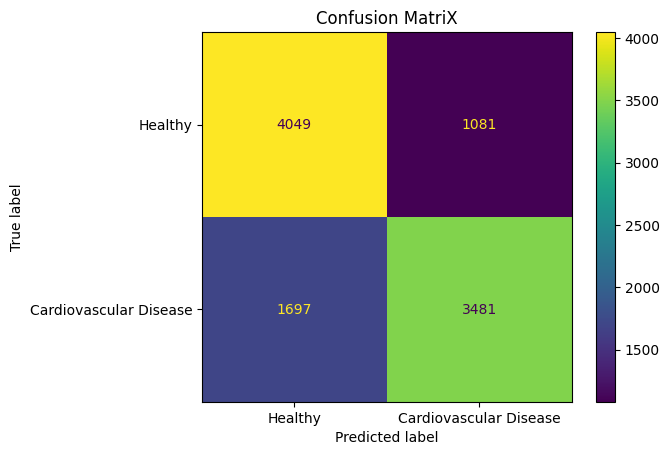

Classification Report:

                        precision    recall  f1-score   support

               Healthy       0.70      0.79      0.74      5130
Cardiovascular Disease       0.76      0.67      0.71      5178

              accuracy                           0.73     10308
             macro avg       0.73      0.73      0.73     10308
          weighted avg       0.73      0.73      0.73     10308



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Healthy", "Cardiovascular Disease"])
cm.plot()
plt.title("Confusion Matrix")
plt.show()
report = classification_report(y_test, y_pred, target_names=["Healthy", "Cardiovascular Disease"])
print("Classification Report:\n")
print(report)

The report and  matrix showcases that approximately 73% of predictions were correct. However the model missclassified 1697 individuals with cardiovascular disease as healthy, which suggests that there is room for improvement.